In [267]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import * # for making colors

def PolyArea(x,y):
    """
    define a function to calculate the area of a polygon using the shoelace algorithm
    inputs: separate numpy arrays of x and y coordinate values
    outputs: the area of the polygon
    """
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [268]:
# read in data
df = pd.read_csv("./dataset.txt", delimiter= "\t")

# select only Vitis riparia, because it is the most represented
df = df[df["species"]=="Vitis_riparia"]

# view columns
df.columns

Index(['species', 'vine', 'year', 'from_tip', 'from_base', 'count',
       'base_vine', 'tip_vine', 'vine_year', 'px2_cm2', 'x1', 'y1', 'x2', 'y2',
       'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8',
       'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13',
       'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18',
       'x19', 'y19', 'x20', 'y20', 'x21', 'y21'],
      dtype='object')

In [269]:
# create arrays of x and y coord values and px_cm scale
arr_x = np.array(df.iloc[:,[10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50]])
arr_y = np.array(df.iloc[:,[11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51]])
arr_px2cm2 = np.array(df.iloc[:,9])

# create indices for leaf area and veins
area_ind = [0,13,14,15,16,17,18,19,20]
vein_ind = [0,5,13,4,14,6,1,8,16,7,17,9,2,11,19,10,20]


In [270]:
# a list to store overall leaf area
leaf_areas = []
# a list to store leaf vein area
leaf_vein_areas = []

# for each leaf
for lf in range(len(arr_x)):
    
    leaf_areas.append( PolyArea( arr_x[lf][area_ind], 
                                 arr_y[lf][area_ind]) / arr_px2cm2[lf] )
    
    leaf_vein_areas.append( PolyArea( arr_x[lf][vein_ind], 
                                 arr_y[lf][vein_ind]) / arr_px2cm2[lf] )

df["area"] = leaf_areas
df["vein_area"] = leaf_vein_areas
df["log_vtb"] = np.log(df["vein_area"] / (df["area"]-df["vein_area"]))

In [271]:
# create color map
cmap = cm.get_cmap('viridis_r', 11)    # PiYG
cols = []

for i in range(cmap.N):
    rgba = cmap(i)
    cols.append(matplotlib.colors.rgb2hex(rgba))

/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_68620/1100693644.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis_r', 11)    # PiYG


/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_68620/365139731.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_68620/365139731.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_68620/365139731.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_68620/365139731.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_68620/365139731.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_68620/365139731.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/74/p7lyl9yx35b6wh5_7x3ply4r0000gq/T/ipykernel_68620/36513

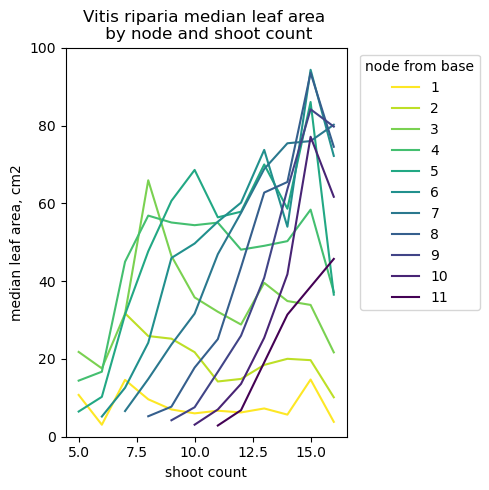

In [272]:
plt.figure(figsize=(5,5))

for node in range(1,12): # node range used is 1 to 11
    
    curr_node = df[df["from_base"]==node]

    nodes = [] # store nodes
    stages = [] # store stages
    medians = [] # store medians

    for stage in np.sort(curr_node["count"].unique()):

        curr_stage = curr_node[curr_node["count"]==stage]

        if len(curr_stage)<3:
            continue

        nodes.append(node)
        stages.append(stage)
        medians.append(np.median(curr_stage["area"]))

    plt.plot(stages, medians, color=cols[node-1], label=node)
    plt.ylim(0,100)
    plt.legend(title="node from base", loc='upper right', bbox_to_anchor=(1.5, 1))
    plt.xlabel("shoot count")
    plt.ylabel("median leaf area, cm2")
    plt.title("Vitis riparia median leaf area \n by node and shoot count")
    plt.tight_layout()
    plt.savefig("leaf_plastochron.jpg")

        